# Model

In [3]:
import sys
import os
sys.path.append("/home/lauro/code/msc-thesis/svgd")
import json

import jax.numpy as np
from jax import grad, jit, vmap, random, lax, jacfwd
from jax import lax
from jax.ops import index_update, index
import matplotlib.pyplot as plt
import numpy as onp
import jax
import pandas as pd
import haiku as hk

import config

import utils
import metrics
import time
import plot
import stein
import train
import kernels
from svgd import SVGD

from jax.experimental import optimizers

rkey = random.PRNGKey(0)

In [12]:
svgd = SVGD(**config.get_svgd_args(config.config))
kernel_params, logt = svgd.train_kernel(**config.get_train_args(config.config))

100%|██████████| 100/100 [02:19<00:00,  1.39s/it]


In [34]:
print(metrics.compute_final_metric(logt["particles"], svgd))
comparison_sample = svgd.target.sample(100)
print(metrics.compute_final_metric(comparison_sample, svgd))

0.001572393
0.002319558


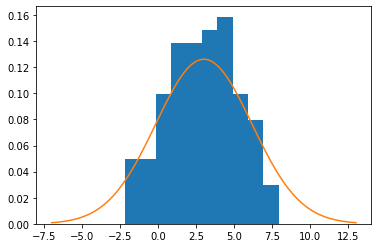

In [24]:
plt.hist(logt["particles"][:, 0], density=True)
grid = np.linspace(-7, 13, 100)
plt.plot(grid, vmap(svgd.target.pdf)(grid))

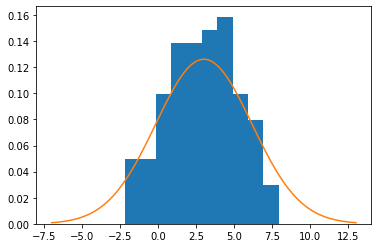

In [35]:
plt.hist(logt["particles"][:, 0], density=True)
grid = np.linspace(-7, 13, 100)
plt.plot(grid, vmap(svgd.target.pdf)(grid))

In [15]:
xout, logs = svgd.sample(kernel_params, **config.get_sample_args(config.config))

100%|██████████| 100/100 [00:13<00:00,  7.27it/s]


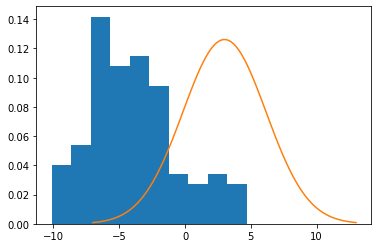

In [26]:
plt.hist(xout[:, 0], density=True)
grid = np.linspace(-7, 13, 100)
plt.plot(grid, vmap(svgd.target.pdf)(grid))

In [27]:
metrics.compute_final_metric(xout, svgd)

DeviceArray(0.0531879, dtype=float32)